In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.util import img_as_float
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Define the image path
image_path = 'C:\\Users\\G_BOOTS\\Desktop\\PROJECTS\\ff\\images\\0001.jpg'

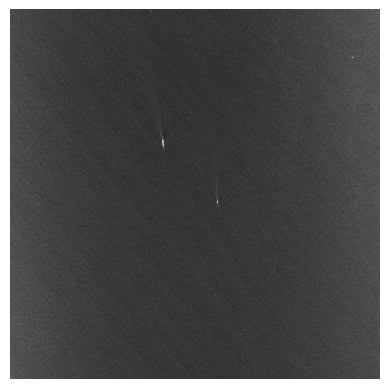

In [20]:
# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    # Try to read the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Failed to load the image at {image_path}.")
    else:
        # Convert the image from BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image using matplotlib
        plt.imshow(image_rgb)
        plt.axis('off')  # Hide axes for better display
        plt.show()

In [21]:
# Define the image directory
image_dir = 'C:\\Users\\G_BOOTS\\Desktop\\PROJECTS\\ff\\images'

In [22]:
# Check if the directory exists
if not os.path.exists(image_dir):
    print(f"Error: The directory at {image_dir} does not exist.")
else:
    # Get a list of all files in the directory
    files = os.listdir(image_dir)
    

In [23]:
    # Filter out only image files (assuming they have .jpg extension, adjust as necessary)
    image_files = [f for f in files if f.endswith('.jpg')]
    
    # Check if there are any image files in the directory
    if not image_files:
        print(f"No image files found in the directory {image_dir}.")
    else:
        # Iterate over each image file
        for image_file in image_files:
            image_path = os.path.join(image_dir, image_file)
            # Try to read the image
            image = cv2.imread(image_path)
            # Check if the image was successfully loaded
            if image is None:
                print(f"Error: Failed to load the image at {image_path}.")

                continue  # Skip to the next image
    # Process the image if it was loaded successfully
    print(f"Successfully loaded the image at {image_path}.")

Successfully loaded the image at C:\Users\G_BOOTS\Desktop\PROJECTS\ff\images\IMG_20230118_193712_1.jpg.


In [24]:
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

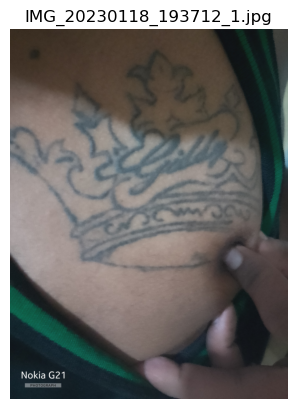

In [26]:
# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better display
plt.title(image_file)  # Optional: display the filename as the title
plt.show()

In [27]:
# Convert image to float
image_float = img_as_float(image_rgb)

In [28]:
# Segment the image using SLIC
segments = slic(image_float, n_segments=100, compactness=10, sigma=1)

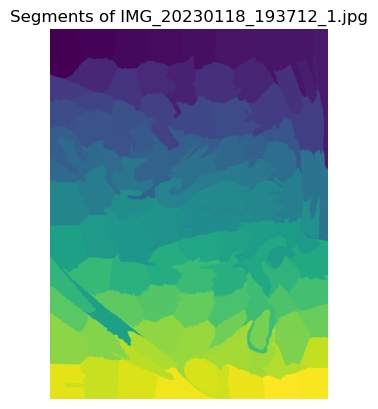

In [29]:
# Display the segments
plt.imshow(segments)
plt.axis('off')
plt.title(f"Segments of {image_file}")
plt.show()

In [30]:
# Define the feature extraction function
def extract_superpixel_features(image, segments):
    features = []
    for segment_value in np.unique(segments):
        mask = segments == segment_value
        superpixel = image[mask]

        # Color features
        mean_color = np.mean(superpixel, axis=0)
        var_color = np.var(superpixel, axis=0)
        # Here, you can add texture and shape features as well

        features.append(np.concatenate([mean_color, var_color]))
    return np.array(features)

In [31]:
# Extract features from the image
features = extract_superpixel_features(image_rgb, segments)

In [32]:
# For simplicity, let's use synthetic data for model training
# In practice, you should use real feature and label data
synthetic_features = np.random.rand(100, features.shape[1])  # 100 samples, matching feature count
synthetic_labels = np.random.randint(2, size=100)  # Binary classification (0 or 1)

In [35]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(synthetic_features, synthetic_labels, test_size=0.3, random_state=42)

In [36]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions on the synthetic test set
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Synthetic Data Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Synthetic Data Accuracy: 60.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.42      0.50      0.45        10

    accuracy                           0.60        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.62      0.60      0.61        30



In [39]:
# Now make predictions on the actual extracted features
try:
    # Check if the features match the model's expected input shape
    if features.shape[1] != model.n_features_in_:
        raise ValueError(f"Mismatch in number of features: extracted {features.shape[1]}, model expects {model.n_features_in_}")

    predictions = model.predict(features)
    print(f"Predictions for {image_file}:", predictions)
except ValueError as e:
    print(e)

Predictions for IMG_20230118_193712_1.jpg: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
